In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import random
from dnn.dnn import DNN
from dnn.activations.ReLU import ReLU
from dnn.activations.Sigmoid import Sigmoid
from dnn.common.get_accuracy import get_accuracy
np.random.seed(1)
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, Y, test_x_orig, test_y, classes = load_data()

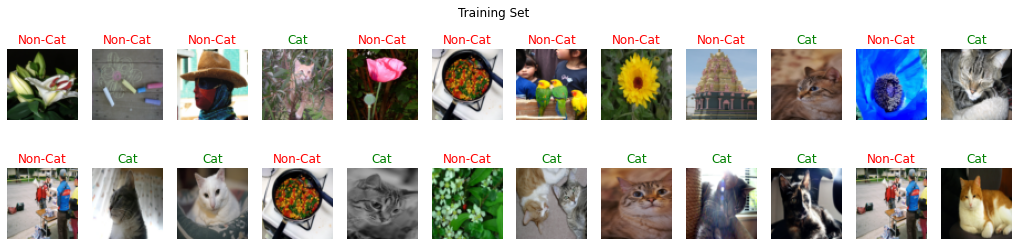

In [3]:
m = 2
n = 12
f, axarr = plt.subplots(2, 12, figsize=(18, 4)) 
[axi.axis('off') for axi in axarr.ravel()]
f.suptitle('Training Set') 
for i in range(m):
    for j in range(n):
        index = random.randrange(Y.shape[1])
        axarr[i, j].imshow(train_x_orig[index])
        if Y[0, index] == 1:
            axarr[i, j].set_title("Cat", color="green")
        else:
             axarr[i, j].set_title("Non-Cat", color="red")

In [4]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
X = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("X's shape: " + str(X.shape))
print ("test_x's shape: " + str(test_x.shape))

X's shape: (12288, 209)
test_x's shape: (12288, 50)


Added input layer with 12288 untis
Added 1 layer with 20 units and ReLU activation
Added 2 layer with 7 units and ReLU activation
Added 3 layer with 5 units and ReLU activation
Added 4 layer with 1 units and Sigmoid activation
--------------------------------
Initialized parameters for layer: 1 with shape: W: (20, 12288), b: (20, 1)
Initialized parameters for layer: 2 with shape: W: (7, 20), b: (7, 1)
Initialized parameters for layer: 3 with shape: W: (5, 7), b: (5, 1)
Initialized parameters for layer: 4 with shape: W: (1, 5), b: (1, 1)
Cost: 0.6741149502607876 at 500 iteration
Cost: 0.5798144171829365 at 1000 iteration
Cost: 0.38076427175655836 at 1500 iteration
Cost: 0.07564892530384199 at 2000 iteration
Accuracy: 0.9904306220095692


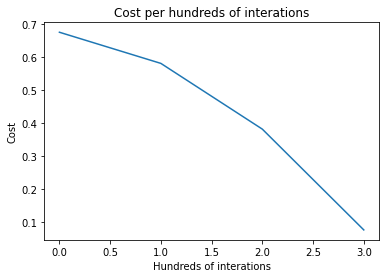

In [29]:
model = DNN()

model.input_layer(X.shape[0])
model.add_layer(units=20, activation=ReLU)
model.add_layer(units=7, activation=ReLU)
model.add_layer(units=5, activation=ReLU)
model.add_layer(units=1, activation=Sigmoid) # output layer 
print("--------------------------------")

model.fit(X, Y, num_epochs=300,minibatch_size=32, init_method="xavier", learning_rate=.0007, 
          regularization="L2", lambd=0.03, optimization="adam", beta1=.9, beta2=.99)

In [40]:
prediction = model.predict(test_x)
a = get_accuracy(prediction, test_y)

Accuracy: 0.7


In [11]:
np.random.rand(*prediction.shape).shape

(1, 50)

In [27]:
ids = np.where(prediction != test_y)
# test_x[:, prediction[0, :] != test_y[0, :]].shape
# test_x.where(prediction.T != test_y.T)
# prediction.T.shape

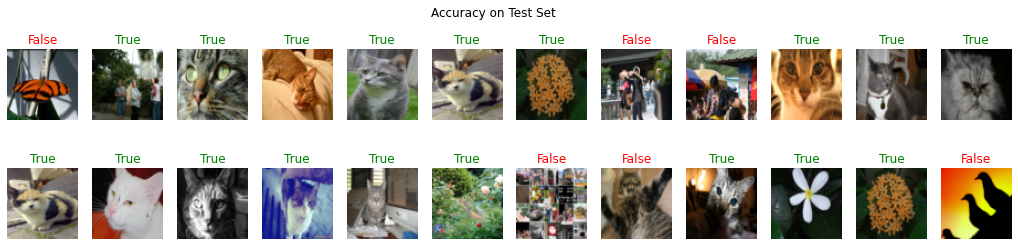

In [28]:
m = 2
n = 12
f, axarr = plt.subplots(m, n, figsize=(18, 4),)
[axi.axis('off') for axi in axarr.ravel()]
f.suptitle('Accuracy on Test Set') 
for i in range(m):
    for j in range(n):
        index = random.randrange(test_y.shape[1])
        axarr[i, j].imshow(test_x_orig[index])
        if prediction[0, index] == test_y[0, index]:
            axarr[i, j].set_title("True", color="green")
        else:
             axarr[i, j].set_title("False", color="red")


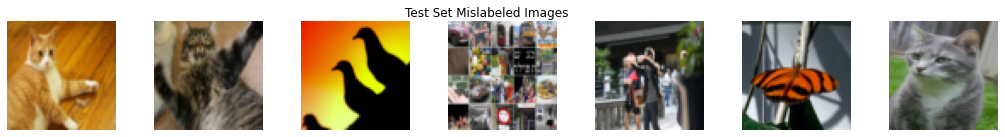

In [76]:
inds = np.where(prediction != test_y)
# incorrect_test_y = test_y[]
incorrect_test_x = test_x_orig[inds[1]]

m = 1
n = incorrect_test_x.shape[0]
f, axarr = plt.subplots(m, n, figsize=(18, 2))
f.suptitle('Test Set Mislabeled Images') 
[axi.axis('off') for axi in axarr.ravel()]
for j in range(n):
    axarr[j].imshow(incorrect_test_x[j])